<a href="https://colab.research.google.com/github/AnkitGoyal430/ml-scripts/blob/master/S2T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import os
import librosa
import IPython.display as ipd
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import warnings
import tables
warnings.filterwarnings("ignore")


In [2]:

from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir /content/MLdataset
!mkdir /content/MLdataset/audio

In [4]:
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

--2019-10-18 06:14:09--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G   107MB/s    in 13s     

2019-10-18 06:14:22 (111 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



In [5]:
 %%time
 !tar xvzf "/content/speech_commands_v0.01.tar.gz" -C "/content/MLdataset/audio"

./
./eight/
./eight/1b88bf70_nohash_0.wav
./eight/798f702a_nohash_2.wav
./eight/b12bef84_nohash_1.wav
./eight/05b2db80_nohash_1.wav
./eight/750e3e75_nohash_0.wav
./eight/3852fca2_nohash_0.wav
./eight/5ac04a92_nohash_0.wav
./eight/778a4a01_nohash_0.wav
./eight/61e50f62_nohash_0.wav
./eight/17c94b23_nohash_0.wav
./eight/037c445a_nohash_1.wav
./eight/11321027_nohash_0.wav
./eight/b97c9f77_nohash_1.wav
./eight/10467b06_nohash_1.wav
./eight/baf01c1f_nohash_0.wav
./eight/48bdc11c_nohash_0.wav
./eight/cb2929ce_nohash_4.wav
./eight/a6285644_nohash_2.wav
./eight/01b4757a_nohash_0.wav
./eight/ea1f888c_nohash_0.wav
./eight/a6285644_nohash_1.wav
./eight/88120683_nohash_0.wav
./eight/f44f440f_nohash_2.wav
./eight/1ecfb537_nohash_2.wav
./eight/7ff4fc72_nohash_0.wav
./eight/57b68383_nohash_2.wav
./eight/f0edc767_nohash_0.wav
./eight/50f55535_nohash_0.wav
./eight/cd7f8c1b_nohash_2.wav
./eight/98582fee_nohash_1.wav
./eight/b8872c20_nohash_0.wav
./eight/4a4e28f1_nohash_3.wav
./eight/9587481f_nohash_0.wa

In [0]:
# !du -h -s "/content/gdrive/My Drive/MLData"

(12971,)
16000


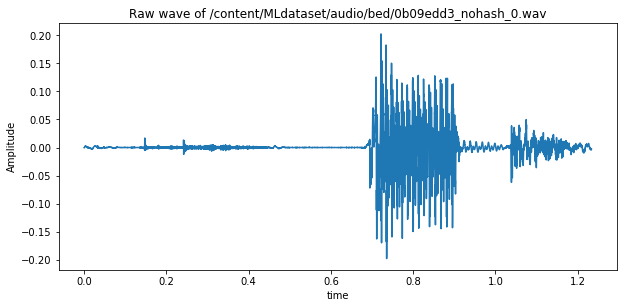

In [6]:
audioPath = "/content/MLdataset/audio/"
samples, sample_rate = librosa.load(audioPath+"bed/0b09edd3_nohash_0.wav", 
                                    sr=16000)
print(samples.shape)
print(sample_rate)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + audioPath+"bed/0b09edd3_nohash_0.wav")
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')

ax1.plot(np.linspace(0, sample_rate/len(samples), len(samples)), samples)

In [7]:
display(ipd.Audio(samples, rate=sample_rate))
print(sample_rate)

16000


In [8]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [9]:
labels = os.listdir(audioPath)
labels = [x for x in labels if ("_" not in x and "." not in x)]
labels.remove("LICENSE")
print(labels)

['down', 'nine', 'two', 'bird', 'bed', 'wow', 'left', 'sheila', 'dog', 'one', 'no', 'five', 'zero', 'four', 'stop', 'house', 'go', 'tree', 'cat', 'up', 'marvin', 'happy', 'yes', 'six', 'eight', 'off', 'three', 'on', 'right', 'seven']


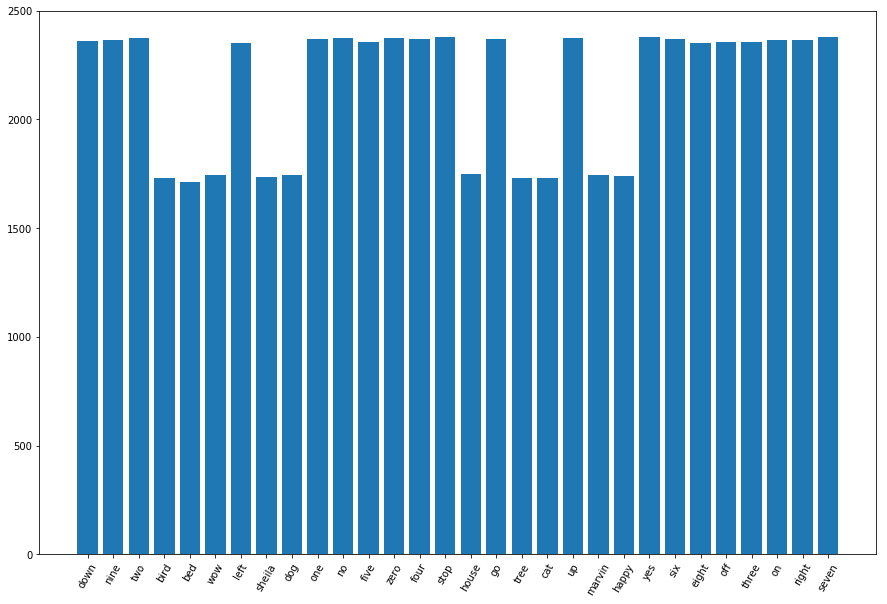

In [10]:
no_of_recordings = []
for label in labels:
    wav = [f for f in os.listdir(audioPath + label) if f.endswith(".wav")]
    no_of_recordings.append(len(wav))
    
plt.figure(figsize=(15, 10))

plt.bar(range(len(no_of_recordings)), no_of_recordings)
plt.xticks(range(len(no_of_recordings)), labels, rotation=60)
plt.show()



In [11]:
%%time
# check the time of each clip
train_path = audioPath
# duration_of_recordings = []

# for label in labels:
#     wav = [f for f in os.listdir(train_path + label) if f.endswith(".wav")]
#     for w in wav:
#         samples, sample_rate = librosa.load(train_path + label + "/" + w)
#         if sample_rate > 0 and len(samples) > 0:
#             duration_of_recordings.append(float(len(samples))/sample_rate)
#         if len(duration_of_recordings) > 1000:
#             break
        
# # print(duration_of_recordings)
            
# plt.figure(figsize=(10, 10))
# plt.hist(np.array(duration_of_recordings))


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 24.8 µs


In [0]:
%%time

all_wave = []
all_label = []

for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_path + label) if f.endswith(".wav")]
    count = 0
    for w in waves:
        samples, sample_rate = librosa.load(train_path + label + "/" + w, sr=16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if len(samples) == 8000:
            all_wave.append(samples)
            all_label.append(label)
            count += 1
        # if count == 500:
        #     break
    print(len(all_wave))

sheila
1578
tree
3099
yes
5256
bird
6777
marvin
8355
five
10516
up
12578
six
14777
left
16942
nine
19116
down
21268
off
23411
four
25569
zero
27772
go
29873
eight
31984
bed
33468
house
35028
no
37126
three
39269
stop
41443
cat
42958
on
45063
seven
47233
right
49388
happy
50937
two
53077
dog
54624
wow
56149
one
58252
CPU times: user 25min 20s, sys: 1h 22min 25s, total: 1h 47min 46s
Wall time: 4h 31min 29s


In [20]:

from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y = le.fit_transform(all_label)
print(y)
classes = list(le.classes_)
print(classes)


NameError: ignored

In [0]:
from keras.utils import np_utils
print(y.shape)
y = np_utils.to_categorical(y, num_classes=len(labels))
print(y)
print(y.shape)

Using TensorFlow backend.


(58252,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(58252, 30)


In [0]:
all_wave = np.array(all_wave).reshape(-1,8000,1)
print(all_wave.shape)
print(y.shape)



(58252, 8000, 1)
(58252, 30)


In [0]:
%%time
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave), np.array(y), 
                                            test_size=0.2, stratify=y, shuffle=True)

CPU times: user 1.75 s, sys: 1.77 s, total: 3.52 s
Wall time: 3.52 s


In [0]:

print(x_tr.shape)



In [0]:
# !mkdir "/content/gdrive/My Drive/dataset/audio"
# !rm "/content/gdrive/My Drive/dataset/audio/dataset.h5"
# h5file.close()

In [0]:
import tables

h5file = tables.open_file("/content/gdrive/My Drive/dataset/audio/dataset3.h5", 
                          mode="w", title="audio data")
root = h5file.root
gcol = h5file.create_group(h5file.root, "columns", "train and test")
h5file.create_array(gcol, "trainIn", x_tr, "train input features")
h5file.create_array(gcol, "trainOut", y_tr, "train output")
h5file.create_array(gcol, "testIn", x_val, "test input features")
h5file.create_array(gcol, "testOut", y_val, "test output")

print(h5file)
h5file.close()



/content/gdrive/My Drive/dataset/audio/dataset3.h5 (File) 'audio data'
Last modif.: 'Thu Oct 17 11:30:53 2019'
Object Tree: 
/ (RootGroup) 'audio data'
/columns (Group) 'train and test'
/columns/testIn (Array(11651, 8000, 1)) 'test input features'
/columns/testOut (Array(11651, 30)) 'test output'
/columns/trainIn (Array(46601, 8000, 1)) 'train input features'
/columns/trainOut (Array(46601, 30)) 'train output'



In [0]:

h5file = tables.open_file("/content/gdrive/My Drive/dataset/audio/dataset3.h5", 
                          mode="a")


In [13]:

# for nodes in h5file:
#   print(nodes)

# for group in h5file.walk_groups():
#   print(group)

data = {}
for group in h5file.walk_groups():
  for array in h5file.list_nodes(group, classname='Array'):
    print(array)
    data[array.name] = array.read()

print(data.keys())
h5file.close()

/columns/testIn (Array(11651, 8000, 1)) 'test input features'
/columns/testOut (Array(11651, 30)) 'test output'
/columns/trainIn (Array(46601, 8000, 1)) 'train input features'
/columns/trainOut (Array(46601, 30)) 'train output'
dict_keys(['testIn', 'testOut', 'trainIn', 'trainOut'])


In [14]:
# Build model

from keras.layers import *
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as k
k.clear_session()

# inp = Input(shape==(8000, 1))
model = Sequential()

model.add(Conv1D(8, 13, strides=1, activation='relu', input_shape=(8000, 1)))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(16, 11, strides=1, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(32, 9, activation='relu', strides=1))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(64, 7, strides=1, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(len(labels), activation='softmax'))
model.summary()



Using TensorFlow backend.








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0         

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('/content/gdrive/My Drive/dataset/best_model.hdf5', monitor='val_acc', 
                     verbose=1, save_best_only=True, mode='max')

In [17]:
# 17:48
history=model.fit(data["trainIn"], data["trainOut"] ,epochs=100, callbacks=[es,mc], batch_size=32, 
                  validation_data=(data["testIn"],data["testOut"]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 46601 samples, validate on 11651 samples
Epoch 1/100





46601/46601 [==============================] - 37s 786us/step - loss: 2.8457 - acc: 0.1537 - val_loss: 2.1895 - val_acc: 0.3288

Epoch 00001: val_acc improved from -inf to 0.32881, saving model to /content/gdrive/My Drive/dataset/best_model.hdf5
Epoch 2/100
46601/46601 [==============================] - 30s 637us/step - loss: 2.0512 - acc: 0.3510 - val_loss: 1.8737 - val_acc: 0.4098

Epoch 00002: val_acc improved from 0.32881 to 0.40975, saving model to /content/gdrive/My Drive/dataset/best_model.hdf5
Epoch 3/100
46601/46601 [==============================] - 29s 627us/step - loss: 1.7306 - acc: 0.4546 - val_loss: 1.3695 - val_acc: 0.5820

Epoch 00003: val_acc improved from 0.40975 to 0.58201, saving model to /content/gdrive/My Drive/dataset/best_model.hdf5
Epoch 4/100
46601/46601 [==============================] - 29s 626us

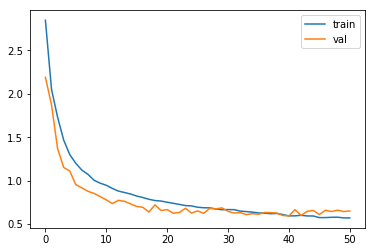

In [18]:
print(history)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()


In [0]:
from datetime import datetime
# time.strftime()
datetime.now()

In [0]:

from keras.models import load_model

model = load_model('/content/gdrive/My Drive/dataset/best_model.hdf5')


In [0]:
def predict(audio):
  probs = model.predict(audio.reshape(1, 8000, 1))
  index = np.argmax(probs)
  return sorted(labels)[index]

In [38]:
import random
for i in range(10):
  index = random.randint(0, len(data["testIn"]-1))
  samples = data["testIn"][index].ravel()

  print("Audio:",sorted(labels)[np.argmax(data["testOut"][index])])
  display(ipd.Audio(samples, rate=8000))
  print("Text:",predict(samples))
  print("============")

Audio: six


Text: six
Audio: cat


Text: cat
Audio: four


Text: six
Audio: seven


Text: seven
Audio: nine


Text: three
Audio: down


Text: down
Audio: marvin


Text: left
Audio: eight


Text: eight
Audio: down


Text: down
Audio: four


Text: four


In [45]:

import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)


start


PortAudioError: ignored

In [44]:
# !pip install sounddevice
!sudo apt-get install libportaudio2